<a href="https://colab.research.google.com/github/david3141592653589793/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Data_Science_Unit_1_Sprint_3_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>

<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*
# Apply the t-test to real data
Your assignment is to determine which issues have "statistically significant" differences between political parties in this 1980s congressional voting data. The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!
<br></br>
Your goals:

1.   Load and clean the data (or determine the best method to drop observations when running tests)
2.   Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3.   Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4.   Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve 2 sample t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.
<br></br>
Stretch goals:

1.   Refactor your code into functions so it's easy to rerun with arbitrary variables
2.   Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [55]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-06-08 19:45:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.1’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2020-06-08 19:45:03 (137 KB/s) - ‘house-votes-84.data.1’ saved [18171/18171]



In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import style
column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']

df = pd.read_csv('house-votes-84.data', names=column_headers)

print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [57]:
df = df.replace({'y': 1, 'n': 0, '?':np.NaN})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [58]:
df.isnull().sum()

party                     0
handicapped-infants      12
water-project            48
budget                   11
physician-fee-freeze     11
el-salvador-aid          15
religious-groups         11
anti-satellite-ban       14
aid-to-contras           15
mx-missile               22
immigration               7
synfuels                 21
education                31
right-to-sue             25
crime                    17
duty-free                28
south-africa            104
dtype: int64

In [66]:
df['party'].value_counts()

democrat      267
republican    168
Name: party, dtype: int64

In [0]:
dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']

In [68]:
print(rep['handicapped-infants'].mean())
print(dem['handicapped-infants'].mean())

0.18787878787878787
0.6046511627906976


In [0]:
mu = 0.18787878787878787 # mean
sigma = 0.6046511627906976 # standard deviation

sample = np.random.normal(mu, sigma, 1000)

In [75]:
abs(mu - np.mean(sample)) < 0.01

True

In [76]:
abs(sigma - np.std(sample, ddof=1)) < 0.01

True

In [0]:
t_df10 = np.random.standard_t(df=10, size=10)
t_df100 = np.random.standard_t(df=100, size=100)
t_df1000 = np.random.standard_t(df=1000, size=1000)

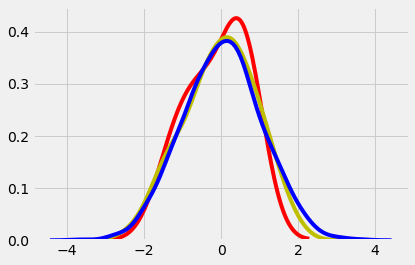

In [83]:
sns.kdeplot(t_df10, color='r');
sns.kdeplot(t_df100, color='y');
sns.kdeplot(t_df1000, color='b');

In [79]:
i = 10
for sample in [t_df10, t_df100, t_df1000]:
    print(f"t - distribution with {i} degrees of freedom")
    print("---" * 10)
    print(f"Mean: {sample.mean()}")
    print(f"Standard Deviation: {sample.std()}")
    print(f"Variance: {sample.var()}")
    i = i*10

t - distribution with 10 degrees of freedom
------------------------------
Mean: -0.0936587506635551
Standard Deviation: 0.7313223604021235
Variance: 0.5348323948241334
t - distribution with 100 degrees of freedom
------------------------------
Mean: -0.02176654133476812
Standard Deviation: 0.9197120871668877
Variance: 0.8458703232808727
t - distribution with 1000 degrees of freedom
------------------------------
Mean: 0.03368620314404143
Standard Deviation: 1.0269486620015984
Variance: 1.0546235543868732
